In [ ]:
#knn
def knn_distances(xTrain,xTest,k):
    """
    objective: to find the k-nearest-neighbour of xTest in xTrain
   
    Input:
    xTrain = n x d matrix. n=rows and d=number of features
    xTest = m x d matrix. m=rows and d=features 
    (Here we have changed the rows value as m because number of rows has been changed)
    d is number of features so they are constant
    k = number of nearest neighbors to be found
    
    Output:
    dists = distances between all xTrain and all XTest points. Size of n x m
    indices = k x m matrix with the indices of the yTrain labels that represent the point
    """
    #the following formula calculates the Euclidean distances.
    import numpy as np
    distances = -2 * xTrain@xTest.T + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis]
    #because of float precision, some small numbers can become negatives. Need to be replace with 0.
    distances[distances < 0] = 0
    distances = distances**.5
    indices = np.argsort(distances, 0) #get indices of sorted items
    distances = np.sort(distances,0) #distances sorted in axis 0
    #returning the top-k closest distances.
    return indices[0:k,:], distances[0:k,:]


def knn_predictions(xTrain,yTrain,xTest,k=3):
    """
    Uses xTrain and yTrain to predict xTest.
    Input:
    xTrain = n x d matrix. n=rows and d=features
    yTrain = n x 1 array. n=rows with label value
    xTest = m x d matrix. m=rows and d=features (same amount of features as xTrain)
    k = number of nearest neighbors to be found
    Output:
    predictions = predicted labels, ie preds(i) is the predicted label of xTest(i,:)
    """
    import numpy as np
    indices, distances = knn_distances(xTrain,xTest,k)
    yTrain = yTrain.flatten()
    rows, columns = indices.shape
    predictions = list()
    for j in range(columns):
        temp = list()
        for i in range(rows):
            cell = indices[i][j]
            temp.append(yTrain[cell])
        predictions.append(max(temp,key=temp.count)) #this is the key function, brings the mode value
    predictions=np.array(predictions)
    return predictions

def knn_accuracy(yTest,predictions):
    """
    Evaluates accuracy of the knn_predictions. Returns a value between 0 and 100%.
    Input:
    yTest = array of shape (n,) where n = rows in test set
    preds = array of shape (n,) where n = rows in test set
    Output:
    accuracy = % of correct answers in the prediction
    """
    import numpy as np
    x=yTest.flatten()==predictions.flatten()
    grade=np.mean(x)
    return np.round(grade*100,2)
print('works fine')

works fine


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
#Loading File
df = pd.read_csv('/content/iris.data',header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
datanew=pd.read_csv('/content/leukemiadatasetnew.csv')
datanew

,Id,Diagnosis,WBC_area,WBC_convex_area,WBC_peri,ecc_wbc,solidity_wbc,orient_wbc,nuc_area,nuc_ratio,...,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,entropy_cyt,minoraxis,majoraxis,minoraxis_nuc,majoraxis_nuc,axismeanratio,Diagnosis.1
0,1,M,14756,14788,467.177,0.606430,0.997836,-77.340194,10873,0.736853,...,124.279938,114.334793,146.376513,-39.830632,124.411969,156.466064,102.639513,139.090644,1.713948,NaN
1,2,M,11502,11927,424.009,0.422003,0.964367,81.775626,8718,0.757955,...,146.361351,133.804598,170.425647,-32.610477,117.092439,129.156376,95.307683,118.903974,1.734573,NaN
2,3,M,2627,2627,207.396,0.853479,1.000000,0.000000,1396,0.531405,...,141.827782,127.362307,169.419984,-20.015020,42.723920,81.983738,34.331789,59.701581,1.531785,NaN
3,4,M,14119,14334,470.848,0.342911,0.985001,-81.633159,10761,0.762164,...,119.571173,104.932102,146.618821,-31.802078,132.680285,141.244229,104.515670,132.477862,1.725660,NaN
4,5,M,2418,2418,193.676,0.777379,1.000000,0.000000,1738,0.718776,...,127.710294,107.279412,147.255882,-10.844707,45.033321,71.591433,35.605061,66.577883,1.720608,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,M,936,936,162.316,0.983565,1.000000,90.000000,628,0.670940,...,101.974026,81.279221,124.480519,-6.921424,15.011107,83.138439,12.659015,68.537775,1.667691,NaN
92,93,M,14152,14279,478.646,0.559114,0.991106,89.598273,10633,0.751343,...,128.979540,116.263143,146.761580,-38.532554,125.084943,150.870006,106.716666,130.981300,1.721327,NaN
93,94,M,9624,9761,374.198,0.291423,0.985965,85.840441,7702,0.800291,...,124.699272,109.359521,142.599896,-28.424099,109.860242,114.845175,96.455564,102.730478,1.772497,NaN
94,95,M,11903,12127,429.134,0.343744,0.981529,-34.194899,8895,0.747291,...,134.031915,124.871343,147.014960,-32.310241,121.647580,129.541369,102.366370,111.978681,1.705924,NaN


In [ ]:
#Use Train-Test-Split to make training and testing datasets/arrays
xTrain, xTest = train_test_split(datanew, test_size=0.3)
yTrain = np.array(xTrain.iloc[:,1])
xTrain = np.array(xTrain.iloc[:,2:-1])
yTest = np.array(xTest.iloc[:,1])
xTest = np.array(xTest.iloc[:,2:-1])

#Characteristics of the arrays
print('Dataset Shapes:')
print('xTrain -->', xTrain.shape)
print('yTrain -->', yTrain.shape)
print('xTest -->', xTest.shape)
print('yTest -->', yTest.shape)
print('\nxTrain: Top rows\n',xTrain[0:5,:])
print('\nyTrain: Top rows\n',yTrain[0:5])

Dataset Shapes:
xTrain --> (67, 22)
yTrain --> (67,)
xTest --> (29, 22)
yTest --> (29,)

xTrain: Top rows
 [[ 4.55900000e+03  4.65400000e+03  2.62188000e+02  7.49786990e-01
   9.79587450e-01  8.53033418e+01  4.12000000e+03  9.03706950e-01
   2.45549000e+02  8.58678800e-01  7.38094420e-01  9.83763130e-01
   4.18800000e+03  9.43143508e+01  8.07539863e+01  1.24947608e+02
  -9.13160830e+00  6.31467391e+01  9.54340589e+01  6.07593531e+01
   9.00542236e+01  1.90582077e+00]
 [ 9.62400000e+03  9.76100000e+03  3.74198000e+02  2.91422900e-01
   9.85964550e-01  8.58404415e+01  7.70200000e+03  8.00290940e-01
   3.42701000e+02  8.24105160e-01  3.44139120e-01  9.59272640e-01
   8.02900000e+03  1.24699272e+02  1.09359521e+02  1.42599896e+02
  -2.84240990e+01  1.09860242e+02  1.14845175e+02  9.64555637e+01
   1.02730478e+02  1.77249706e+00]
 [ 4.50000000e+02  4.50000000e+02  8.39160000e+01  8.66025400e-01
   1.00000000e+00  0.00000000e+00  2.04000000e+02  4.53333330e-01
   8.22550000e+01  3.78891980e-

In [ ]:
#The knn_predictions function will call knn_distances and bring back prediction based
# on the distance and the size of k.
predictions = knn_predictions(xTrain, yTrain, xTest,3)
print('Size of Predictions Array:\n', predictions.shape)
#print('\nPredictions Array:\n',knn_predictions(xTrain,yTrain,xTest,3))



Size of Predictions Array:
 (29,)


In [ ]:
#Will call knn_accuracy, which was imported from knn.py file
print('Accuracy:',knn_accuracy(predictions,yTest),'%')


Accuracy: 79.31 %


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt 


In [ ]:
#will first check which is the best k
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    #neigh = KNeighborsClassifier(n_neighbors = n).fit(xTrain,yTrain)
    #yhat=neigh.predict(xTest)
    yhat = knn_predictions(xTrain,yTrain,xTest,n)
    mean_acc[n-1] = metrics.accuracy_score(yTest, yhat)
    std_acc[n-1] = np.std(yhat==yTest)/np.sqrt(yhat.shape[0])

print( "The best accuracy was:", np.round(mean_acc.max()*100,2), "% with k=", mean_acc.argmax()+1) 


The best accuracy was: 89.66 % with k= 1


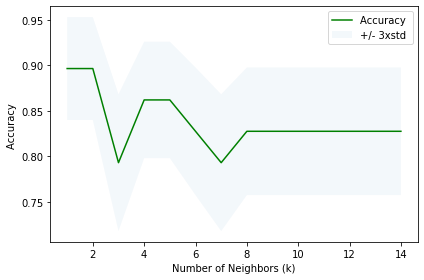

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.05)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()
